In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

**Reading the CSV File**

In [5]:
df=pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\COVID\covid_19_india.csv")

In [6]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
15109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [9]:
#Getting the basic statistics
df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


**Removing the unnecessary columns**

In [14]:
df.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

In [15]:
df.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1.0,2020-01-30,Kerala,0.0,0.0,1.0
1,2.0,2020-01-31,Kerala,0.0,0.0,1.0
2,3.0,2020-02-01,Kerala,0.0,0.0,2.0
3,4.0,2020-02-02,Kerala,0.0,0.0,3.0
4,5.0,2020-02-03,Kerala,0.0,0.0,3.0


**Checking for duplicates and removing if any**

In [16]:
df.isnull().sum()

Sno                     28
Date                    28
State/UnionTerritory    28
Cured                   28
Deaths                  28
Confirmed               28
dtype: int64

In [18]:
df=df.dropna()

In [19]:
df.isna().sum()

Sno                     0
Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [20]:
df.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1.0,2020-01-30,Kerala,0.0,0.0,1.0
1,2.0,2020-01-31,Kerala,0.0,0.0,1.0
2,3.0,2020-02-01,Kerala,0.0,0.0,2.0
3,4.0,2020-02-02,Kerala,0.0,0.0,3.0
4,5.0,2020-02-03,Kerala,0.0,0.0,3.0


**Active Cases**

In [26]:
df.loc[:,'Active Cases'] = df['Confirmed'] - (df['Cured']+df['Deaths'])

In [27]:
df.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,1.0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2.0,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,3.0,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,4.0,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,5.0,2020-02-03,Kerala,0.0,0.0,3.0,3.0


**Creating a Pivot table to show Recovery Rate, Mortality Rate amongst the States**

In [29]:
statewise = pd.pivot_table(df,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc='max')

In [32]:
statewise['Recovery Rate'] = (statewise['Cured']*100)/statewise['Confirmed']

In [33]:
statewise['Mortality Rate'] = (statewise['Deaths']*100)/statewise['Confirmed']

In [34]:
statewise.style.background_gradient(cmap='coolwarm')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,6674.000000,6359.000000,92.000000,95.280192,1.378484
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Arunachal Pradesh,22462.000000,19977.000000,88.000000,88.936871,0.391773
Assam,340858.000000,290774.000000,2344.000000,85.306491,0.687676
Bihar,664115.000000,595377.000000,4039.000000,89.649684,0.608178
Cases being reassigned to states,9265.000000,0.000000,0.000000,0.000000,0.000000
Chandigarh,56513.000000,48831.000000,647.000000,86.406667,1.144869
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443
Dadra and Nagar Haveli and Daman and Diu,9652.000000,8944.000000,4.000000,92.664733,0.041442


**Top 10 States with Most Active Cases**

In [37]:
top_10_active_cases = df.groupby(by = 'State/UnionTerritory').max()[['Date','Active Cases']]

In [46]:
top_cases=top_10_active_cases.sort_values(by= ['Active Cases'],ascending=False).reset_index()

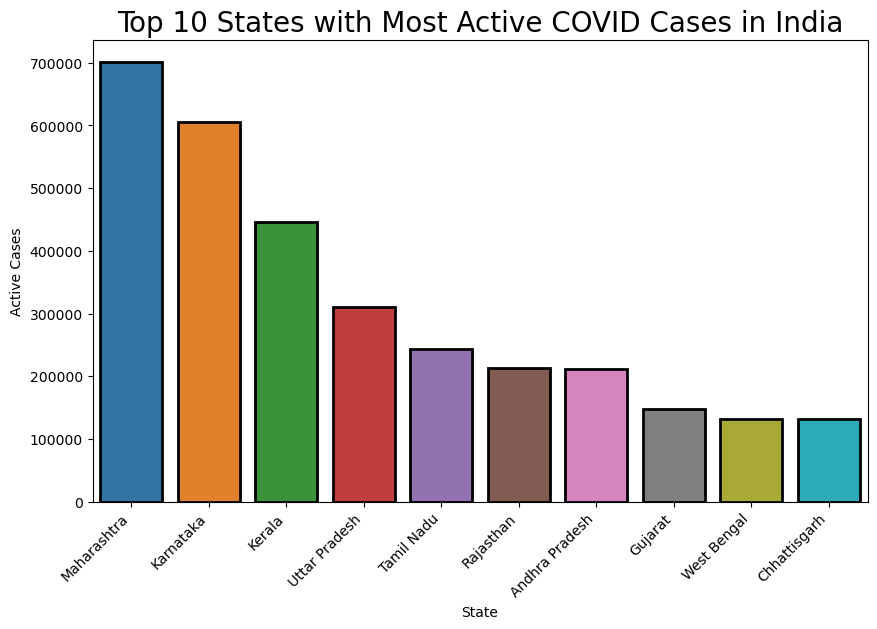

In [47]:
fig=plt.figure(figsize=(10,6))
plt.title('Top 10 States with Most Active COVID Cases in India',size=20)
sns.barplot(data=top_cases.iloc[:10],x='State/UnionTerritory',y='Active Cases',linewidth=2,edgecolor='Black')
plt.xlabel('State')
plt.ylabel('Active Cases')
plt.xticks(rotation=45,ha='right')
plt.show()


In [49]:
df.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,1.0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2.0,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,3.0,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,4.0,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,5.0,2020-02-03,Kerala,0.0,0.0,3.0,3.0


**Top 10 States with Maximum Deaths**

In [50]:
top_10_deaths = df.groupby(by = 'State/UnionTerritory').max()[['Date','Deaths']]

In [52]:
top_10_states_death=top_10_deaths.sort_values(by='Deaths',ascending=False).reset_index()

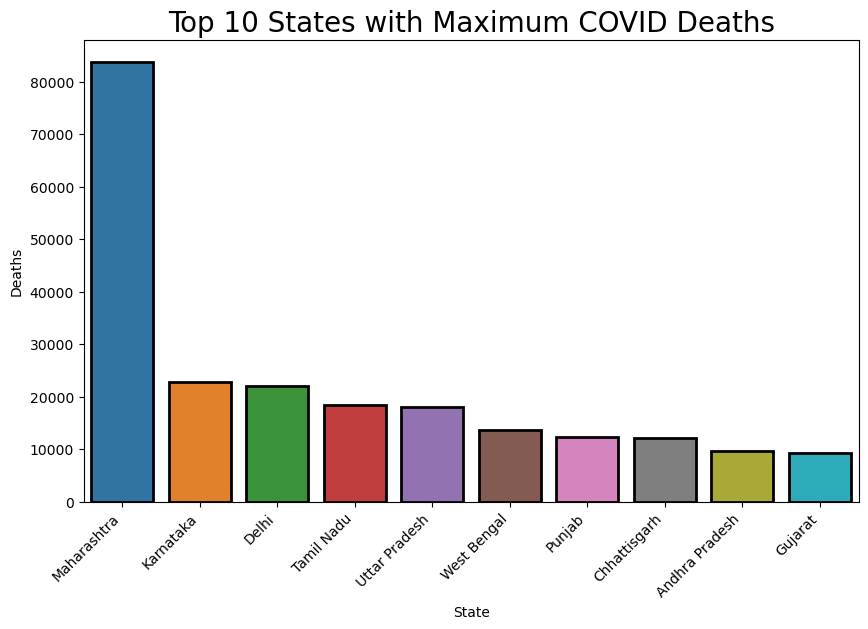

In [58]:
fig=plt.figure(figsize=(10,6))
plt.title('Top 10 States with Maximum COVID Deaths',size=20)
sns.barplot(data=top_10_states_death.iloc[:10],x='State/UnionTerritory',y='Deaths',linewidth=2,edgecolor='black')
plt.xlabel('State')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Deaths')
plt.show()

**Trends over time for the Top 5 Most affected States**

In [59]:
most_affected = ['Maharashtra','Karnataka','Delhi','Tamil Nadu','Uttar Pradesh']

In [62]:
most_affected_states = df[df['State/UnionTerritory'].isin(most_affected)]

In [66]:
most_affected_states.loc[:,'Date']=pd.to_datetime(most_affected_states['Date'])

C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


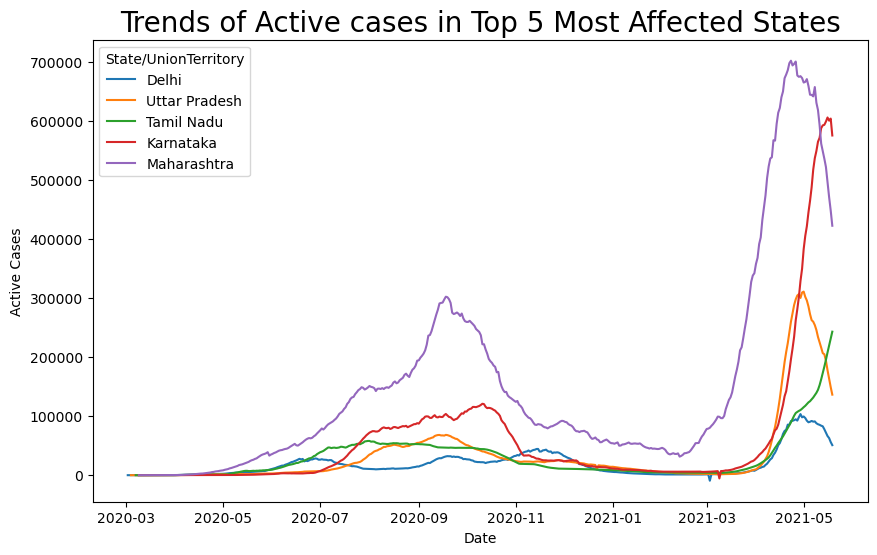

In [68]:
fig=plt.figure(figsize=(10,6))
plt.title('Trends of Active cases in Top 5 Most Affected States',size=20)
sns.lineplot(data=most_affected_states,x='Date',y='Active Cases',hue='State/UnionTerritory')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.show()

**Month wise analysis of confirmed cases in India**

In [77]:
df.loc[:,'Month-Year']=df['Date'].dt.to_period('M')

In [78]:
df.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Month-Year
0,1.0,2020-01-30,Kerala,0.0,0.0,1.0,1.0,2020-01
1,2.0,2020-01-31,Kerala,0.0,0.0,1.0,1.0,2020-01
2,3.0,2020-02-01,Kerala,0.0,0.0,2.0,2.0,2020-02
3,4.0,2020-02-02,Kerala,0.0,0.0,3.0,3.0,2020-02
4,5.0,2020-02-03,Kerala,0.0,0.0,3.0,3.0,2020-02


**Aggregating the data by Month**

In [89]:
df_month = df.groupby(by=['Month-Year']).sum(numeric_only=True).reset_index()

In [90]:
df_month.head()

,Month-Year,Sno,Cured,Deaths,Confirmed,Active Cases
0,2020-01,3.0,0.0,0.0,2.0,2.0
1,2020-02,493.0,0.0,0.0,86.0,86.0
2,2020-03,139689.0,808.0,202.0,9687.0,8677.0
3,2020-04,952796.0,75443.0,13270.0,422442.0,333729.0
4,2020-05,2088522.0,1133341.0,89834.0,2938234.0,1715059.0


In [115]:
df_month.dtypes

Month-Year      period[M]
Sno               float64
Cured             float64
Deaths            float64
Confirmed         float64
Active Cases      float64
dtype: object

In [117]:
df_month['Month-Year'] = df_month['Month-Year'].astype(str)


In [118]:
df_month['Confirmed'] = pd.to_numeric(df_month['Confirmed'], errors='coerce')


C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


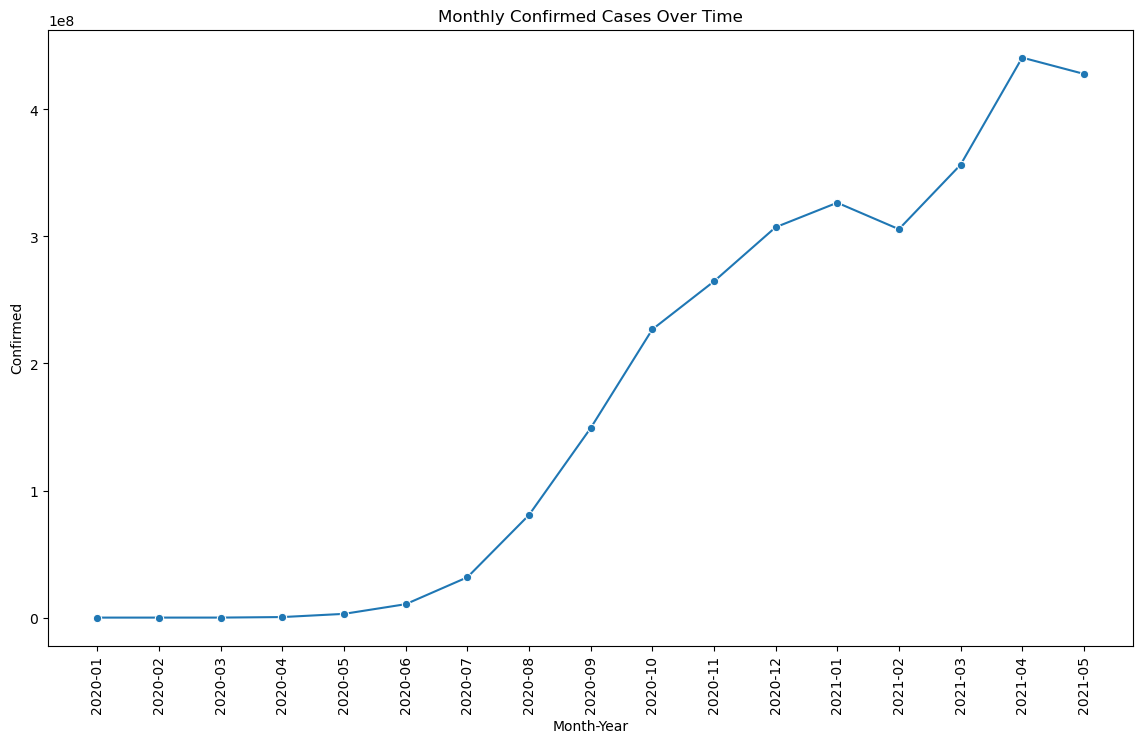

In [121]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month-Year', y='Confirmed', data=df_month, marker='o')
plt.title('Monthly Confirmed Cases Over Time')
plt.xticks(rotation=90)
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

**Reading the second CSV file**

In [124]:
df2=pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\COVID\covid_vaccine_statewise.csv")

In [125]:
df2.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


**Renaming the columns**

In [126]:
df2.rename(columns={'Updated On':'Vaccine_date'},inplace=True)

In [127]:
df2.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

**Checking for null/missing values**

In [128]:
df2.isnull().sum()

Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [129]:
#Dropping missing values columns
df3= df2.drop(columns = ['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)',
                                  '60+ Years (Doses Administered)'],axis=1) 

In [130]:
df3.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


**Male vs Female Vaccination Ratio**

In [131]:
male = df3['Male(Individuals Vaccinated)'].sum()


In [132]:
female=df3['Female(Individuals Vaccinated)'].sum()


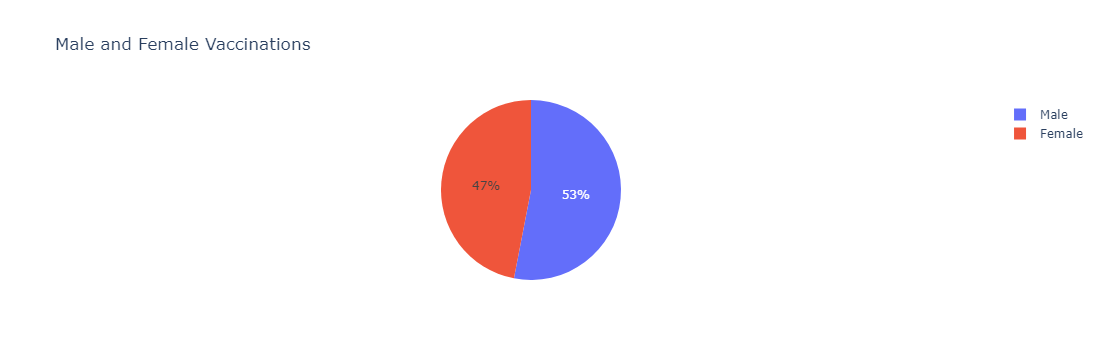

In [133]:
px.pie(names=['Male','Female'],values=[male,female],title='Male and Female Vaccinations')



**Removing the rows where state is India**

In [134]:
df3=df3[df3['State']!='India']

In [135]:
df3.rename(columns = {"Total Individuals Vaccinated":"Total"},inplace=True)

In [136]:
df3.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


**Total Vaccinations over time**

In [137]:
df3.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [80]:
df3.drop(['Total Doses Administered'],axis=1)

,Vaccine_date,State,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df3.dtypes

Vaccine_date                            object
State                                   object
Total Doses Administered               float64
Sessions                               float64
 Sites                                 float64
First Dose Administered                float64
Second Dose Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
18-44 Years(Individuals Vaccinated)    float64
45-60 Years(Individuals Vaccinated)    float64
60+ Years(Individuals Vaccinated)      float64
Male(Individuals Vaccinated)           float64
Female(Individuals Vaccinated)         float64
Transgender(Individuals Vaccinated)    float64
Total                                  float64
dtype: object

In [139]:
df3.loc[:,'Vaccine_date'] = pd.to_datetime(df3['Vaccine_date'])

C:\Users\shash\AppData\Local\Temp\ipykernel_24944\1014274227.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [87]:
df3.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [88]:
total_vac_time = df3.groupby('Vaccine_date')['Total'].sum().reset_index()

In [140]:
total_vac_time

,Vaccine_date,Total
0,2021-01-16,48276.0
1,2021-01-17,58604.0
2,2021-01-18,99449.0
3,2021-01-19,195525.0
4,2021-01-20,251280.0
...,...,...
208,2021-08-12,0.0
209,2021-08-13,0.0
210,2021-08-14,0.0
211,2021-08-15,0.0


C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



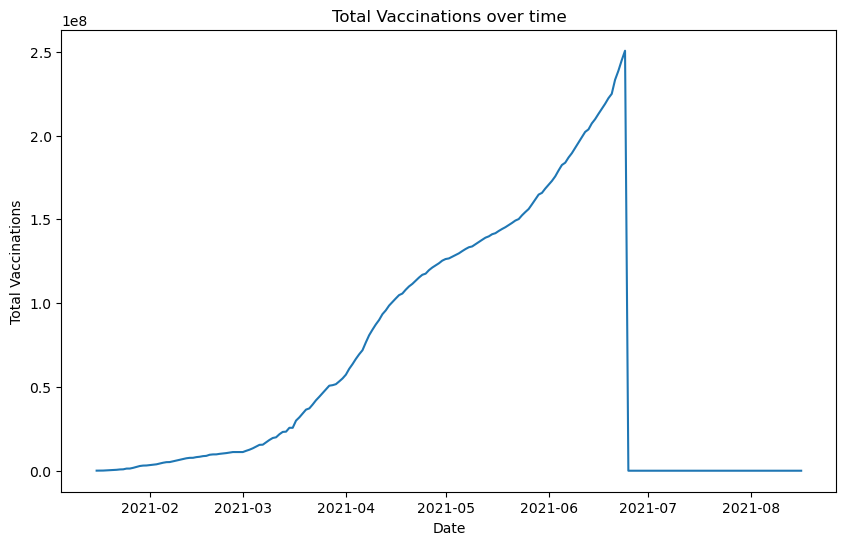

In [141]:
fig=plt.figure(figsize=(10,6))
plt.title('Total Vaccinations over time')
sns.lineplot(data=total_vac_time,y='Total',x='Vaccine_date')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()

In [142]:
df3.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,2021-01-16 00:00:00,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,2021-01-17 00:00:00,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,2021-01-18 00:00:00,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,2021-01-19 00:00:00,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,2021-01-20 00:00:00,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


**Top 5 and Bottom 5 states with maximum vaccinations**

In [154]:
vac_by_states = df3.groupby('State')['Total'].sum().reset_index()
top_5_vaccinated_states = vac_by_states.sort_values(by='Total', ascending=False).head(5)
bottom_5_vaccinated_states = vac_by_states.sort_values(by='Total', ascending=True).head(5)


In [155]:
top_5_vaccinated_states

,State,Total
20,Maharashtra,1.403075e+09
33,Uttar Pradesh,1.200575e+09
28,Rajasthan,1.141163e+09
10,Gujarat,1.078261e+09
35,West Bengal,9.250227e+08


In [156]:
bottom_5_vaccinated_states

,State,Total
18,Lakshadweep,2124715.0
0,Andaman and Nicobar Islands,8102125.0
17,Ladakh,9466289.0
7,Dadra and Nagar Haveli and Daman and Diu,11358600.0
29,Sikkim,16136752.0


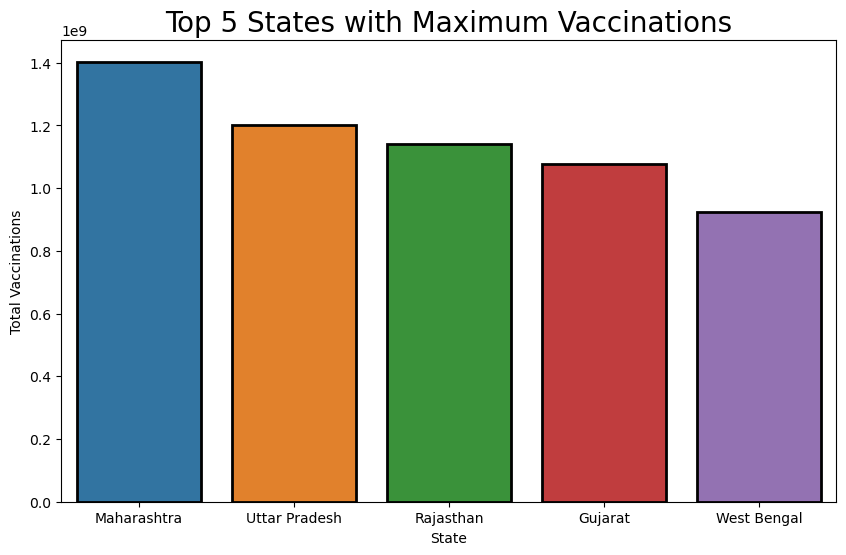

In [158]:
fig=plt.figure(figsize=(10,6))
plt.title('Top 5 States with Maximum Vaccinations', size=20)
sns.barplot(data = top_5_vaccinated_states,x='State',y='Total',linewidth=2,edgecolor='Black')
plt.xlabel('State')
plt.ylabel('Total Vaccinations')
plt.show()

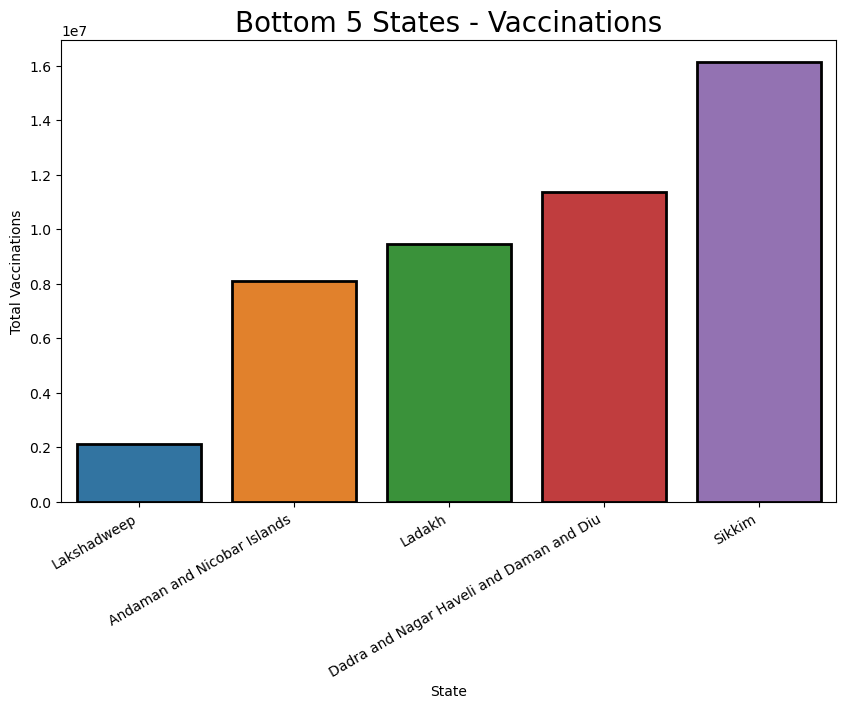

In [162]:
fig=plt.figure(figsize=(10,6))
plt.title('Bottom 5 States - Vaccinations', size=20)
sns.barplot(data = bottom_5_vaccinated_states,x='State',y='Total',linewidth=2,edgecolor='Black')
plt.xlabel('State')
plt.xticks(rotation=30,ha='right')
plt.ylabel('Total Vaccinations')
plt.show()